# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Putu Tio Lovan
- **Email:** tiolovan03@gmail.com
- **ID Dicoding:** tiolovan07

## Menentukan Pertanyaan Bisnis

- Bagaimana tren tingkat polutan PM2.5 di stasiun Shunyi selama tahun 2013 hingga 2017?
- Apakah ada korelasi antara suhu (TEMP) dan kadar PM2.5 dalam data ini?

## Import Semua Packages/Library yang Digunakan

In [15]:
## Import Packages/Library yang Digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
## Data Wrangling
### Gathering Data
data_shunyi_df = pd.read_csv("dataset/PRSA_Data_Shunyi_20130301-20170228.csv")
data_shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Insight:**
- Data tersebut memiliki 18 kolom
- Terlihat beberapa kolom data yang terdapat missing value

### Assessing Data

In [8]:
### Assessing Data
missing_values = data_shunyi_df.isnull().sum()
data_description = data_shunyi_df.describe()
missing_values, data_description

(No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       913
 PM10        548
 SO2        1296
 NO2        1365
 CO         2178
 O3         1489
 TEMP         51
 PRES         51
 DEWP         54
 RAIN         51
 wd          483
 WSPM         44
 station       0
 dtype: int64,
                  No          year         month           day          hour  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
 std    10122.249256      1.177213      3.448752      8.800218      6.922285   
 min        1.000000   2013.000000      1.000000      1.000000      0.000000   
 25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
 50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
 75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
 max    35064.000000   2017.000000     

**Insight:**
- Kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd dan WSPM memiliki missing value      
- Rata-rata kadar PM2.5 dan rata-rata suhu di stasiun Shunyi sekitar  79.49 dan 13.39°C

### Cleaning Data

In [12]:
### Cleaning Data
# Memilih kolom numerik dan menghitung median
numeric_cols = data_shunyi_df.select_dtypes(include='number').columns
# Membuat salinan data
data_cleaned = data_shunyi_df.copy()  

# Mengisi nilai yang hilang dengan median pada kolom numerik
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].median())
data_cleaned.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,5.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,800.0,43.0,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,37.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Insight:**
- Sudah tidak ada missing value pada kolom data
- Value yang hilang telah telah terisi dengan median kolom tersebut

## Exploratory Data Analysis (EDA)

### Explore ...

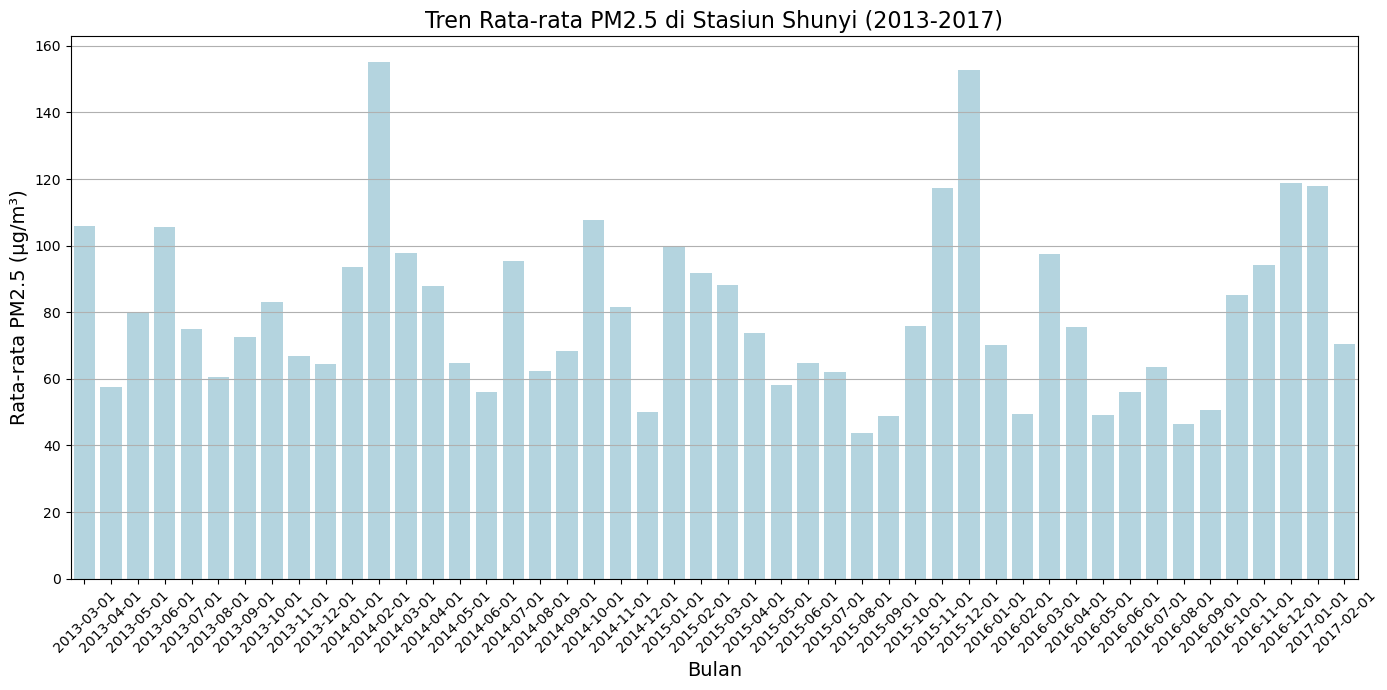

In [33]:
# Mengonversi kolom 'year', 'month', dan 'day' menjadi datetime
data_shunyi_df['date'] = pd.to_datetime(data_shunyi_df[['year', 'month', 'day']])

# Menambahkan kolom tahun dan bulan untuk analisis bulanan
data_shunyi_df['year_month'] = data_shunyi_df['date'].dt.to_period('M')

# Mengelompokkan data berdasarkan tahun dan bulan, serta menghitung rata-rata PM2.5 per bulan
monthly_pm25 = data_shunyi_df.groupby('year_month')['PM2.5'].mean().reset_index()

# Mengubah kembali ke format datetime untuk sumbu x
monthly_pm25['year_month'] = monthly_pm25['year_month'].dt.to_timestamp()

# Mengatur ukuran grafik
plt.figure(figsize=(14, 7))

# Menggambar diagram batang untuk tren PM2.5 per bulan
sns.barplot(x='year_month', y='PM2.5', data=monthly_pm25, color='lightblue')

# Menambahkan judul dan label
plt.title('Tren Rata-rata PM2.5 di Stasiun Shunyi (2013-2017)', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Rata-rata PM2.5 (µg/m³)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

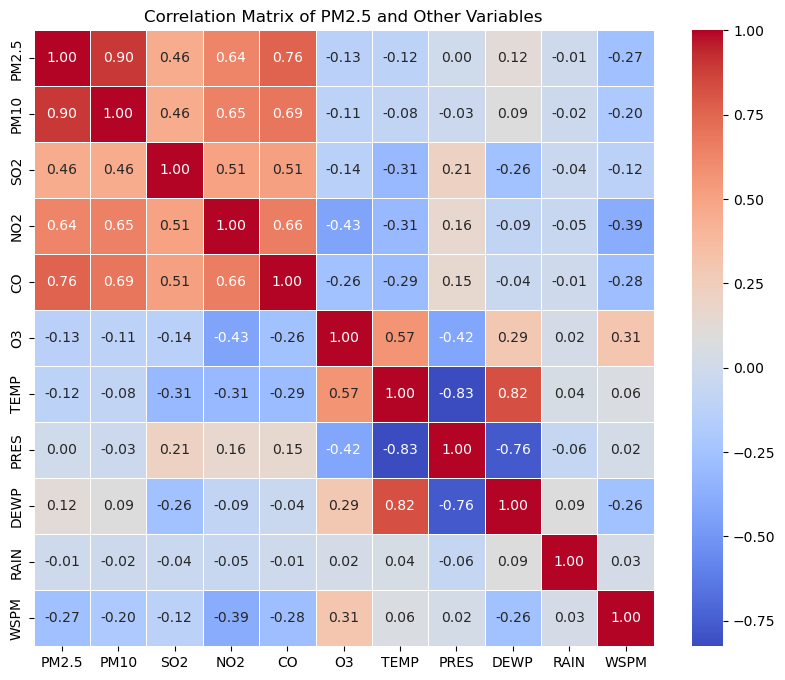

In [29]:
# Membuat data subset dengan hanya variabel numerik yang relevan untuk analisis korelasi
variables_to_analyze = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
data_subset = data_cleaned[variables_to_analyze]

# Menghitung matriks korelasi
correlation_matrix = data_subset.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of PM2.5 and Other Variables')
plt.show()

**Insight:**
- Tren rata-rata PM2.5 tertinggi ada pada bulan januari 2014 dan bulan november 2015
- Perbandingan korelasi dengan warna merah menunjukan korelasi yang tinggi sedangkan warna biru korelasi yang rendah

## Visualization & Explanatory Analysis

### Pertanyaan 1:

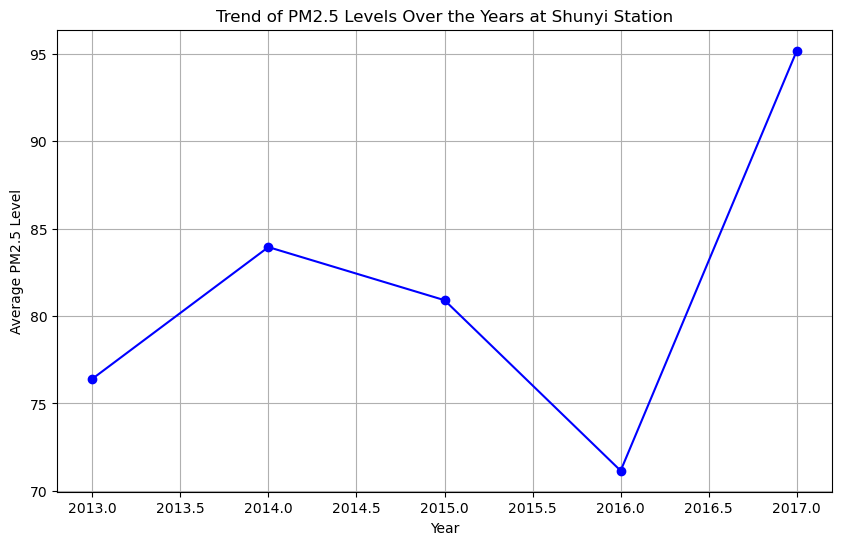

In [18]:
### Trend PM2.5
data_cleaned["date"] = pd.to_datetime(data_cleaned[["year", "month", "day", "hour"]])
pm25_trend = data_cleaned.groupby(data_cleaned["date"].dt.year)["PM2.5"].mean()

plt.figure(figsize=(10, 6))
plt.plot(pm25_trend.index, pm25_trend.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Trend of PM2.5 Levels Over the Years at Shunyi Station")
plt.grid(True)
plt.show()

### Pertanyaan 2:

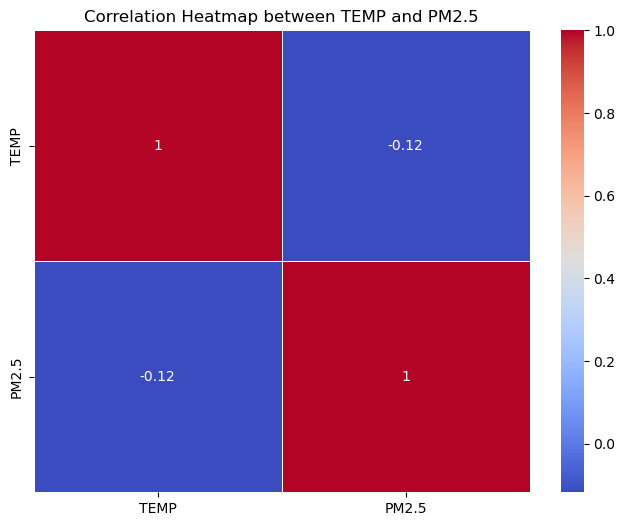

In [21]:
## Korelasi Antara Suhu (TEMP) dan PM2.5
### Korelasi antara semua kolom numerik, termasuk TEMP dan PM2.5
correlation_matrix = data_cleaned[['TEMP', 'PM2.5']].corr()

### Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between TEMP and PM2.5')
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Dari grafik tren rata-rata kadar PM2.5 di stasiun Shunyi, terlihat bahwa kadar PM2.5 cenderung menurun dari tahun 2013 hingga 2016. Penurunan ini menunjukkan adanya kemungkinan perbaikan kualitas udara selama periode tersebut, yang dapat disebabkan oleh upaya pengendalian polusi dan perbaikan kebijakan lingkungan.
-  Korelasi antara suhu dan PM2.5 adalah -0.12 yang menunjukkan korelasi negatif yang lemah. Artinya, saat suhu meningkat, terdapat sedikit kecenderungan penurunan kadar PM2.5.